### Spotify Data (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spotify.csv')

In [4]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


Q1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [7]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

Q2)  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

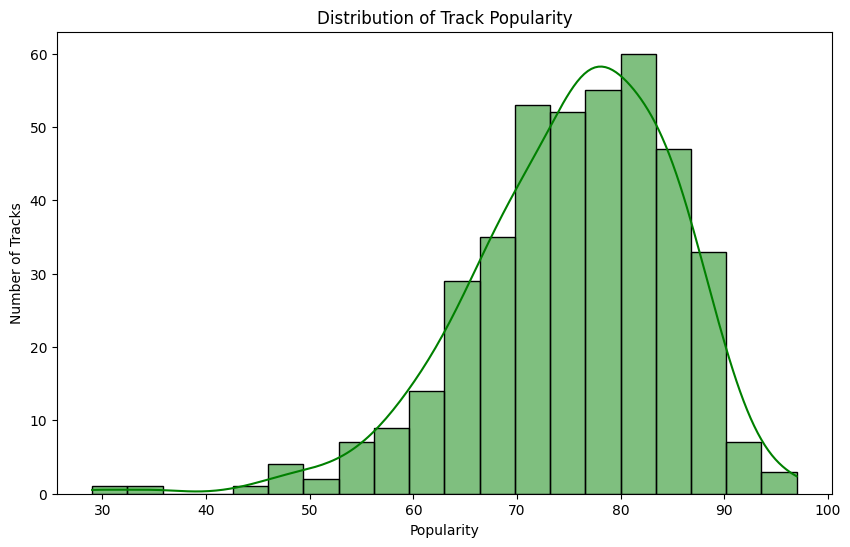

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color = 'Green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

Q3)  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

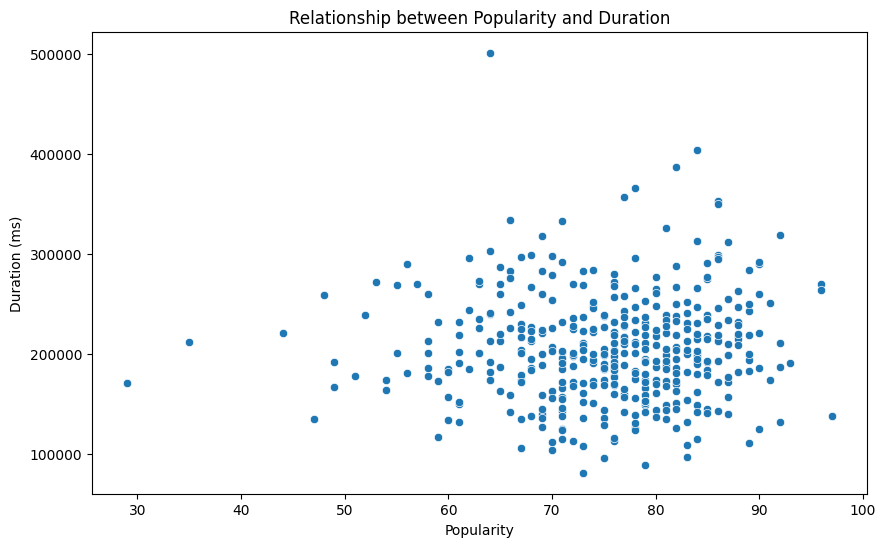

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='Popularity', y ='Duration (ms)', data = df)
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

Q4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

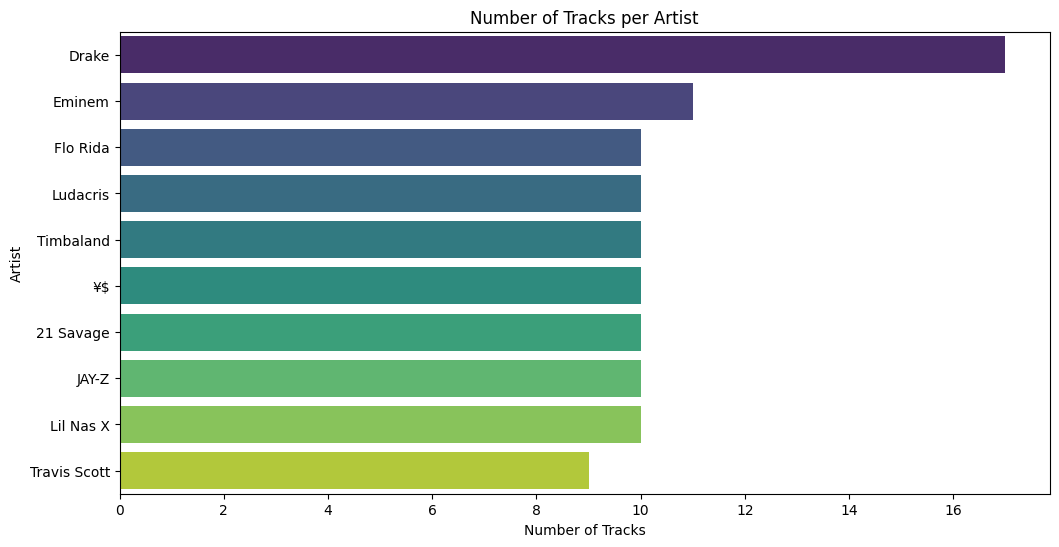

In [41]:
plt.figure(figsize = (12, 6))
sns.countplot(y ='Artist', data = df, order = df['Artist'].value_counts().head(10).index, palette ='viridis')
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

Q5) What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

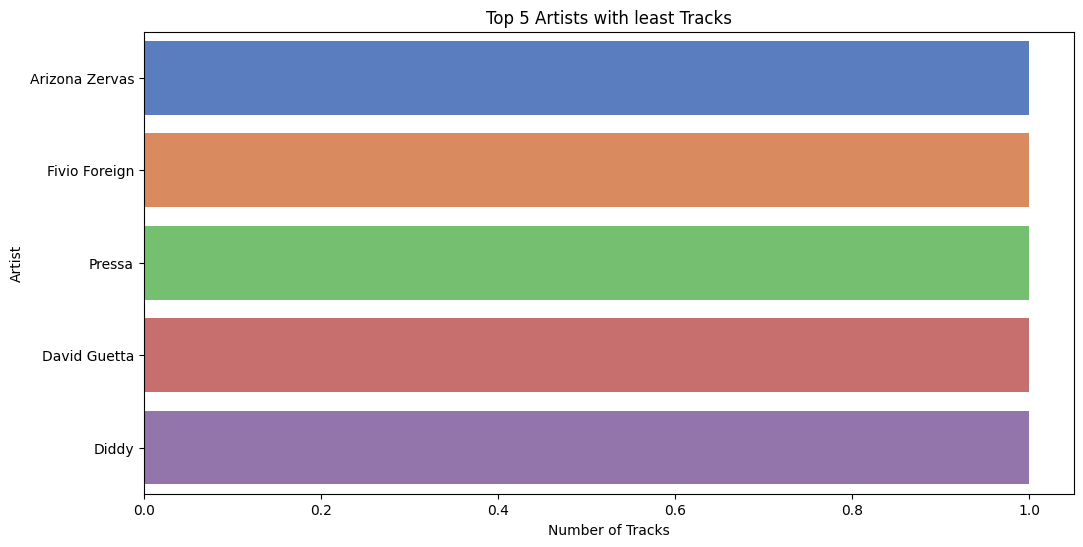

In [44]:
plt.figure(figsize=(12, 6))
top_5_least_artists = df['Artist'].value_counts().tail(5).index
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_5_least_artists)], order= top_5_least_artists, palette='muted')
plt.title('Top 5 Artists with least Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

Q6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [45]:
top_5_artists = df['Artist'].value_counts().head(5).index

average_popularity = {}

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    average_popularity[artist] = artist_tracks['Popularity'].mean()

for artist, popularity in average_popularity.items():
  print(f"Artist: {artist}, Average Popularity: {popularity}")

max_popularity_artist = max(average_popularity, key=average_popularity.get)
print(f"\nThe artist with the highest average popularity among the top 5 is: {max_popularity_artist}")

Artist: Drake, Average Popularity: 82.88235294117646
Artist: Eminem, Average Popularity: 83.63636363636364
Artist: Flo Rida, Average Popularity: 78.0
Artist: Ludacris, Average Popularity: 63.0
Artist: Timbaland, Average Popularity: 69.0

The artist with the highest average popularity among the top 5 is: Eminem


Q7)  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [47]:
top_5_artists = df['Artist'].value_counts().head(5).index

most_popular_track = {}

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track[artist] = artist_tracks.loc[artist_tracks['Popularity'].idxmax(), 'Track Name']

for artist, track in most_popular_track.items():
    print(f"Artist: {artist}, Most Popular Track: {track}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)
Artist: Ludacris, Most Popular Track: My Chick Bad
Artist: Timbaland, Most Popular Track: The Way I Are


Q8) Visualize relationships between multiple numerical variables simultaneously using a pair plot.

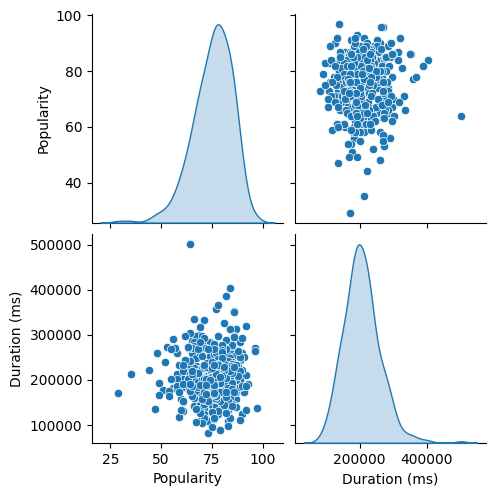

In [66]:
numerical_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

Q9) Does the duration of tracks vary significantly across different artists ? Explore this visually using a box plot or violin plot.

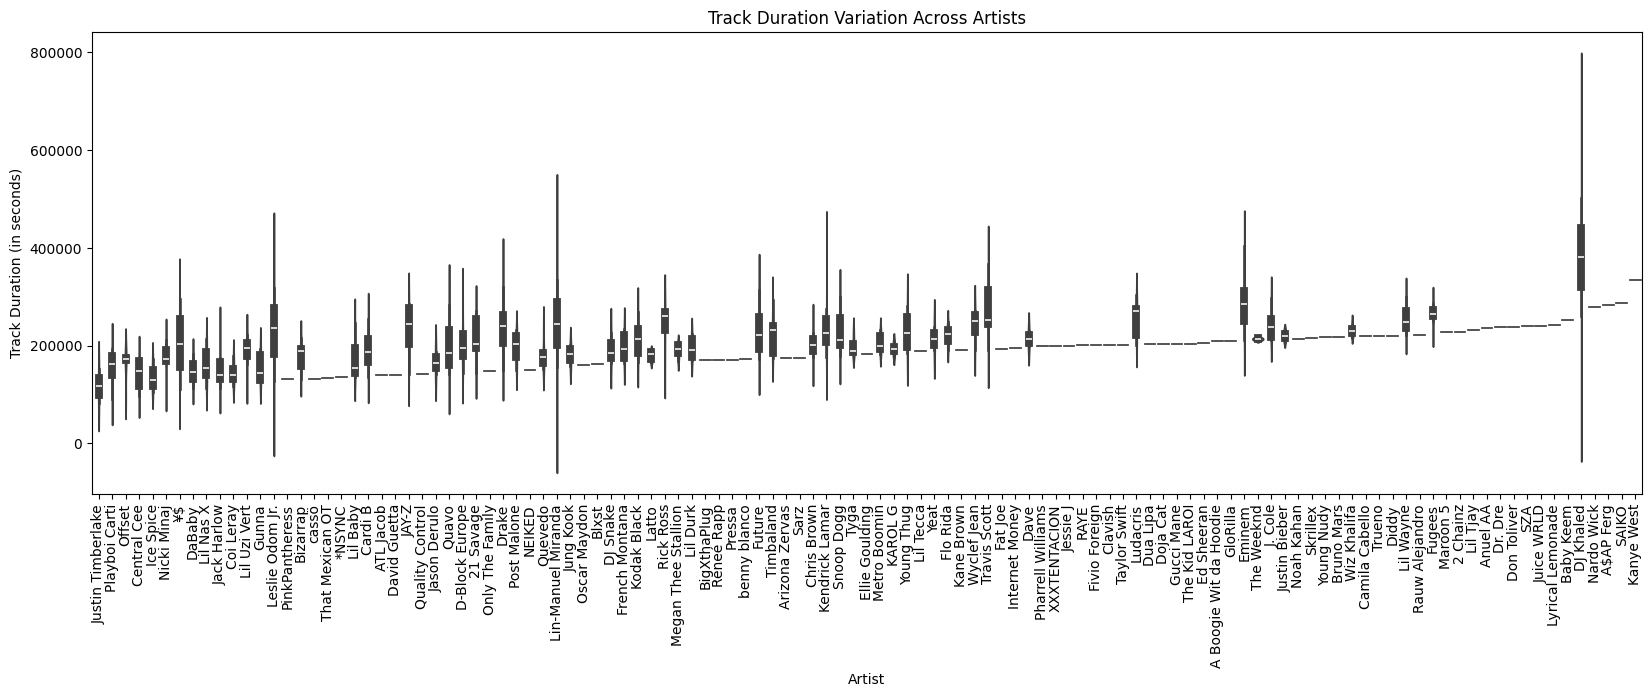

In [80]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data = df.sort_values('Duration (ms)'))
plt.title('Track Duration Variation Across Artists')
plt.xlabel('Artist')
plt.ylabel('Track Duration (in seconds)')
plt.xticks(rotation=90)
plt.show()

Q10) How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

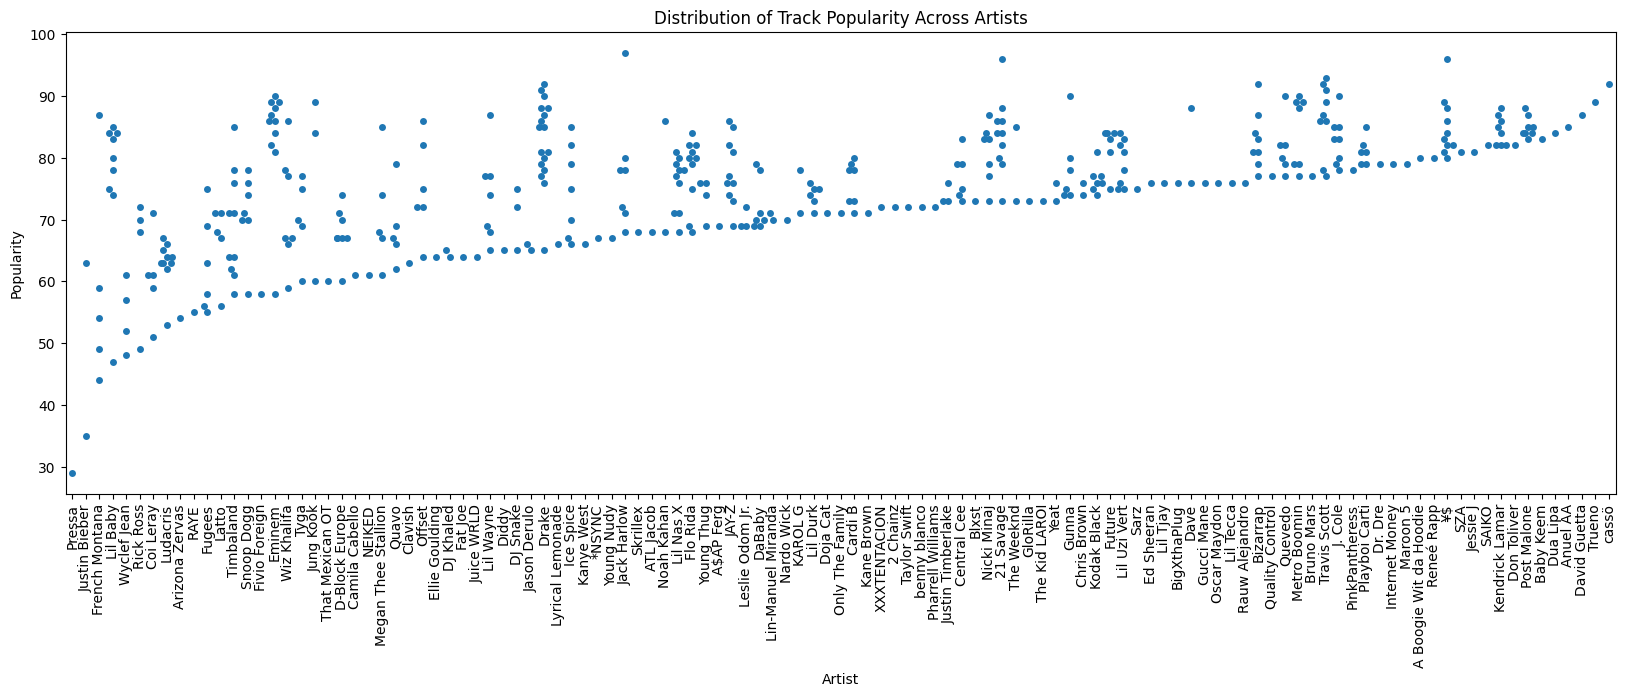

In [86]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Artist', y='Popularity', data = df.sort_values('Popularity'))
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

In [82]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')